In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import ace_tools as tools#


ModuleNotFoundError: No module named 'ace_tools'

In [4]:

db = pd.read_csv("C:/Users/Piotr/Desktop/python/USA Housing Dataset.csv")
db = db.round(0)
db.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.0,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.0,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.0,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.0,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,3.0,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [5]:
#check null data
db_null = db.isnull()
print(db_null.isnull().sum())
# db = round(db["bathrooms"],0)
db

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.0,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.0,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.0,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.0,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,3.0,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,308167.0,3.0,2.0,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4136,2014-07-09 00:00:00,534333.0,3.0,2.0,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4137,2014-07-09 00:00:00,416904.0,3.0,2.0,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,2014-07-10 00:00:00,203400.0,4.0,2.0,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [6]:
#add new column with sum of rooms
db["rooms"] = db["bathrooms"] + db["bedrooms"]


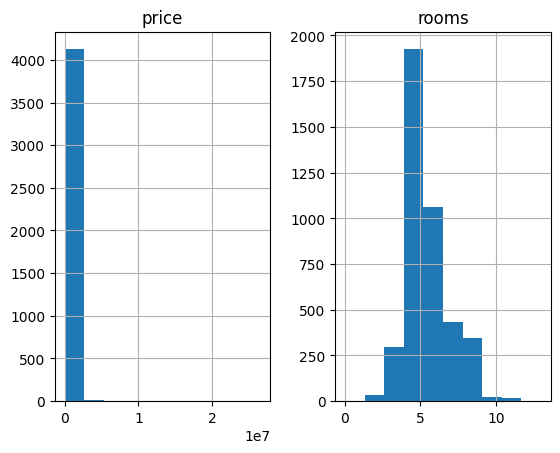

In [9]:
#first histogram
first_plot= db[["price","rooms"]].hist(bins=10)
plt.show()

In [8]:
db[["price","rooms"]].skew() 

price    24.763681
rooms     0.529967
dtype: float64

In [10]:
#add log values
db['log_price'] = np.log1p(db["price"])
db['log_rooms'] = np.log1p(db["rooms"])
#remove extreme values from price variable
db = db[db['price'] < db['price'].quantile(0.99)]

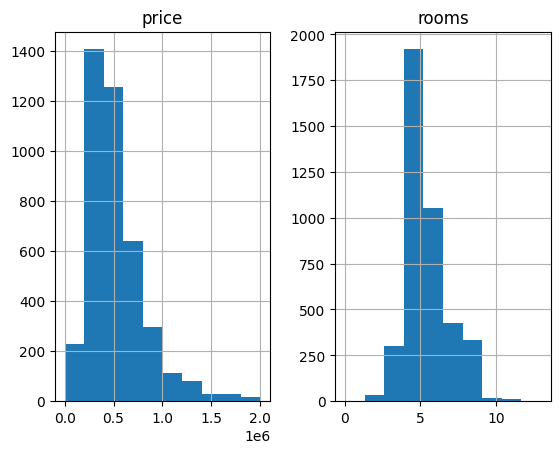

In [11]:
first_plot= db[["price","rooms"]].hist(bins=10)
plt.show()

In [13]:
#test Shapiro for each variable
_,price_shapiro = stats.shapiro(db["price"])
_,rooms_shapiro = stats.shapiro(db["rooms"])

# If sample has more than 5000 observations i should take test D’Agostino-Pearson. Otherwise, the shapiro test will be the best choice.
def normal_test(db):
    if db["price"].count() >=5000:
        stat_rooms, p_rooms= stats.normaltest(db["rooms"])#[0]
        stat_price, p_price = stats.normaltest(db["price"])
        test_name= "D’Agostino-Pearson"
    # print(f' D’Agostino-Pearsona test:{stats.normaltest(db[["rooms","price"]])[0]}')
    
    else:
        # print(f'Shapiro test:{stats.shapiro(db[["price","rooms"]])[0]}')
        stat_rooms, p_rooms= stats.shapiro(db["rooms"])#[0]
        stat_price, p_price= stats.shapiro(db["price"])
        test_name= "Shapiro-Wilk"
    
    result= {
        "Test": test_name,
        "Statistic": {"rooms": stat_rooms, "price": stat_price},
        "p-value": {"rooms": p_rooms, "price": p_price}
    }
    print(f'{test_name} test: {result}')
    return result   
# _,shapiro = stats.shapiro(db[["price","rooms"]])
# print(price_shapiro)
# print(rooms_shapiro)
result = normal_test(db)
#based on the shapiro test, the distribution is not normal, so I should take Spearman correlation method 

Shapiro-Wilk test: {'Test': 'Shapiro-Wilk', 'Statistic': {'rooms': np.float64(0.9387803042759224), 'price': np.float64(0.8867187458866418)}, 'p-value': {'rooms': np.float64(3.6104457490744447e-38), 'price': np.float64(9.632741372951621e-48)}}


In [52]:
#better vizualization results from the test
df_normal_test = pd.DataFrame({
    "Variables": ["rooms", "price"],
    "Statistic": [result["Statistic"]["rooms"], result["Statistic"]["price"]],
    "p-value": [result["p-value"]["rooms"], result["p-value"]["price"]]
})


print("\n Results for normal test:")
print(f"{'Variable':<10}{'Statistic':<20}{'p-value':<20}")
print(f"{'-'*50}")

for index, row in df_normal_test.iterrows():
    print(f"{row['Zmienna']:<10}{row['Statystyka']:<20.5f}{row['p-value']:<20.5e}")


 Wyniki testu normalności:
Zmienna   Statystyka          p-value             
--------------------------------------------------
rooms     0.93878             3.61045e-38         
price     0.88672             9.63274e-48         


In [21]:
#Depending on the p-value of the normal test, I choose the type of correlation
def choose_correlation_test (db,col1,col2):
    normal_test_result = normal_test(db)
    p_value_rooms = normal_test_result["p-value"]["rooms"]
    p_value_price = normal_test_result["p-value"]["price"]
    
    if p_value_rooms > 0.05 and  p_value_price > 0.05:
        test_name= "Pearson"
        corr, p_value = stats.pearsonr(db[col1], db[col2])
    else:
        test_name= "Spearman"
        corr, p_value = stats.spearmanr(db[col1], db[col2])

    print(f"Test name: {test_name}")
    print(f"Correlation: {corr:.3f}, p-value: {p_value:.5f}")
    
choose_correlation_test(db, "price", "rooms")

Shapiro-Wilk test: {'Test': 'Shapiro-Wilk', 'Statistic': {'rooms': np.float64(0.9387803042759224), 'price': np.float64(0.8867187458866418)}, 'p-value': {'rooms': np.float64(3.6104457490744447e-38), 'price': np.float64(9.632741372951621e-48)}}
Test name: Spearman
Correlation: 0.438, p-value: 0.00000
